### Ajout de centroïds au sein d'une même classe pour raffiner la classification. 

_On cherche à rendre l'algorithme de classification plus performant. On a constaté que pour certains chiffres, différents types d'écritures reviennent. Dès lors, il peut être pertinent d'exhiber ces différentes typographies, pour permettre à l'algorithme d'avoir une vision plus raffinée des différentes classes auxquelles chaque image peut appartenir._

_Prenons le chiffre "1": on observe que s'il s'écrit généralement comme une barre verticale, il peut également s'écrire de façon très ou légèrement inclinée vers la droite. Mais alors, le classifieur peut aisément le confondre avec un 7 ou un 2. C'est la raison pour laquelle on a décidé de faire trois centroïds différents du chiffre 1._

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
import sklearn
import itertools

In [2]:
mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2,random_state=22)

In [4]:
idx = np.where((y_train == 1))[0]
x_train = [np.reshape(X_train[i], (1,784)) for i in range(len(X_train))]
new_x_train = np.array([np.squeeze(x_train[i], axis=0) for i in range(len(x_train))])

X1 = np.array(new_x_train)[idx]
Y11 = np.array(y_train)[idx]
Y1 = np.reshape(Y11, (len(Y11),))

In [5]:
from sklearn.cluster import KMeans

kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(X1,Y1)

In [6]:
centroid1 = kmeans.cluster_centers_

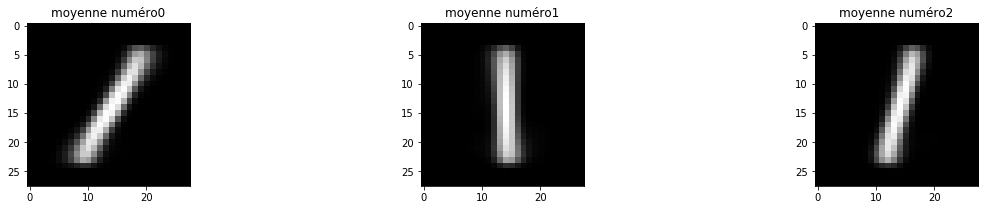

In [8]:
fig, ax = plt.subplots(1,3,figsize=(20,3)) # affichage des centroïdes du chiffre 1
for i in range(3):
    ax[i].imshow(np.reshape(centroid1[i], (28,28)),cmap='gray')
    ax[i].set_title("moyenne numéro"+str(i))
plt.show()